## A. Pengenalan

### Final Project 4
=== program Python for Data science Hacktiv8 x Kampus Merdeka, Kelompok 4 kelas KS18 ===
- Achmad Dhiaulhaq (PYTN-KS18-019)
- Dizqy Hidayat DM (PYTN-KS18-020)
- Naufal Fakhry Pratama (PYTN-KS18-014)

### Project overview :

- Latar belakang pemilihan kasus : 
dalam project ini pemilihan kasus didasari oleh penerapan pembalajaran yang sudah dipelajari pada program Python for Data Science Hacktiv8, untuk final project 4 yang ingin digapai adalah penerapan pembelajaran dari konsep clustering menggunakan machine learning. Dalam final project 4 ini kami disarankan menggunakan model algoritma K-Means dan beberapa algoritma clustering lainnya.
- Dataset yang digunakan :
Sesuai intruksi dari program python for data science dari Hacktiv8 x Kampus Merdeka, untuk final project 4 menggunakan dataset yang sudah disediakan yaitu data "Credit Card Dataset for Clustering" dari website kagle dengan link (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata). Data yang tersedia berukuran 902.88 kB dan berbentuk CSV yang mencakup 18 Kolom dan 8950 baris , Kumpulan data ini berisi variabel untuk clustering data yang tujuannya digunakan untuk membuat customer segmentation guna kebutuhan marketing startegy.

Berikut adalah informasi atribut dari dataset yang diberikan:
1. CUSTID - Identification of Credit Card holder (Categorical)
2. BALANCE - Balance amount left in their account to make purchases (
3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES - Amount of purchases made from account
5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
7. CASHADVANCE - Cash in advance given by the user
8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
installments are being done (1 = frequently done, 0 = not frequently done)
11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
13. PURCHASESTRX - Number of purchase transactions made
14. CREDITLIMIT - Limit of Credit Card for user
15. PAYMENTS - Amount of Payment done by user
16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
17. PRCFULLPAYMENT - Percent of full payment paid by user
18. TENURE - Tenure of credit card service for user


- Objective yang ingin dicapai :
  - Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
  - Mampu mempersiapkan data untuk digunakan dalam Clustering
  - Mampu mengimplementasikan Clustering pada data yang diberikan



- Hasil yang diharapkan :
    - Model dapat melakukan clustering dari data yang disajikan guna membuat customer segementation untuk marketing strategy

## B. Import pustaka yang dibutuhkan

tahap ini dilakukan pengimportan library yang dibutuhkan seperti pandas,numpy,Sklearn, dan lainnya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show
# K-Means Clusterinng
from sklearn.cluster import KMeans
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc
#DBSCAN
from sklearn.cluster import DBSCAN

import pickle

import warnings
warnings.filterwarnings("ignore")

bold = '\033[1m'
normal = '\033[0m'

## C. Data Loading

Data loading merupakan proses memuat dataset kedalam notebook untuk dilakukan analisa dan develop model machine learning

Import Dataset

In [2]:
#Membaca data
df = pd.read_csv("CC GENERAL.csv")
pd.set_option("display.max_columns", None)

In [3]:
#Menampilkan 5 data teratas pada data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Menampilkan 5 data terbawah pada data
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Number of Rows and Columns

In [5]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Dari data tersebut di dapatkan jumlah baris terdiri dari",len(df), "dan jumlah kolom berjumlah",len(df.columns))

Dari data tersebut di dapatkan jumlah baris terdiri dari 8950 dan jumlah kolom berjumlah 18


Columns

In [6]:
# Melihat nama kolom pada data
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Type of Data

In [7]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## D. Data Cleaning

Data Cleaning dilakukan untuk membersihkan dan mempersiapkan data sehingga dapat diolah dengan benar dalam analisis data. Proses ini melibatkan identifikasi, penanganan, dan perbaikan masalah atau ketidaksesuaian dalam data yang dapat mempengaruhi hasil analisis.

### D.1 Handling Missing Value dan Duplicate Data
missing value merupakan data yang hilang dan harus diidentifikasi untuk penanganannya. 
begitu juga data yang duplikat harus dilakukan penanganan berupa penghapusan data yang terduplikasi.

==== Inspection Data ====

- Check Missing Values

In [8]:
#Mengecek missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


- Check Duplicated Data

In [9]:
#Mengecek data duplikat
df.duplicated().sum()

0

dikarenakan dataset tersebut tidak didapati data duplikat maka kita dapat melanjutkannya kebagian handling missing values.

- Handling Missing Values

kami memutuskan untuk mengisi value yang kosong dengan menggunakan Mean / rata-rata dari value di atribut tersebut

In [10]:
#Menangani missing values dengan mean
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

In [11]:
#Mengecek kembali missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## E. Explorasi Data
adalah proses analisis data yang bertujuan untuk memahami karakteristik, pola, dan informasi yang terkandung dalam dataset.
Explorasi data dimudahkan dengan menggunakan visualisasi data

### E.1 Describe Data
Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.

In [12]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### E.2 Correlation Data 
visualisasi kolerasi data digunakan untuk melihat data-data saling berhubungan, semakin tinggi nilai kolerasi berarti hubungan antar data semakin kuat  

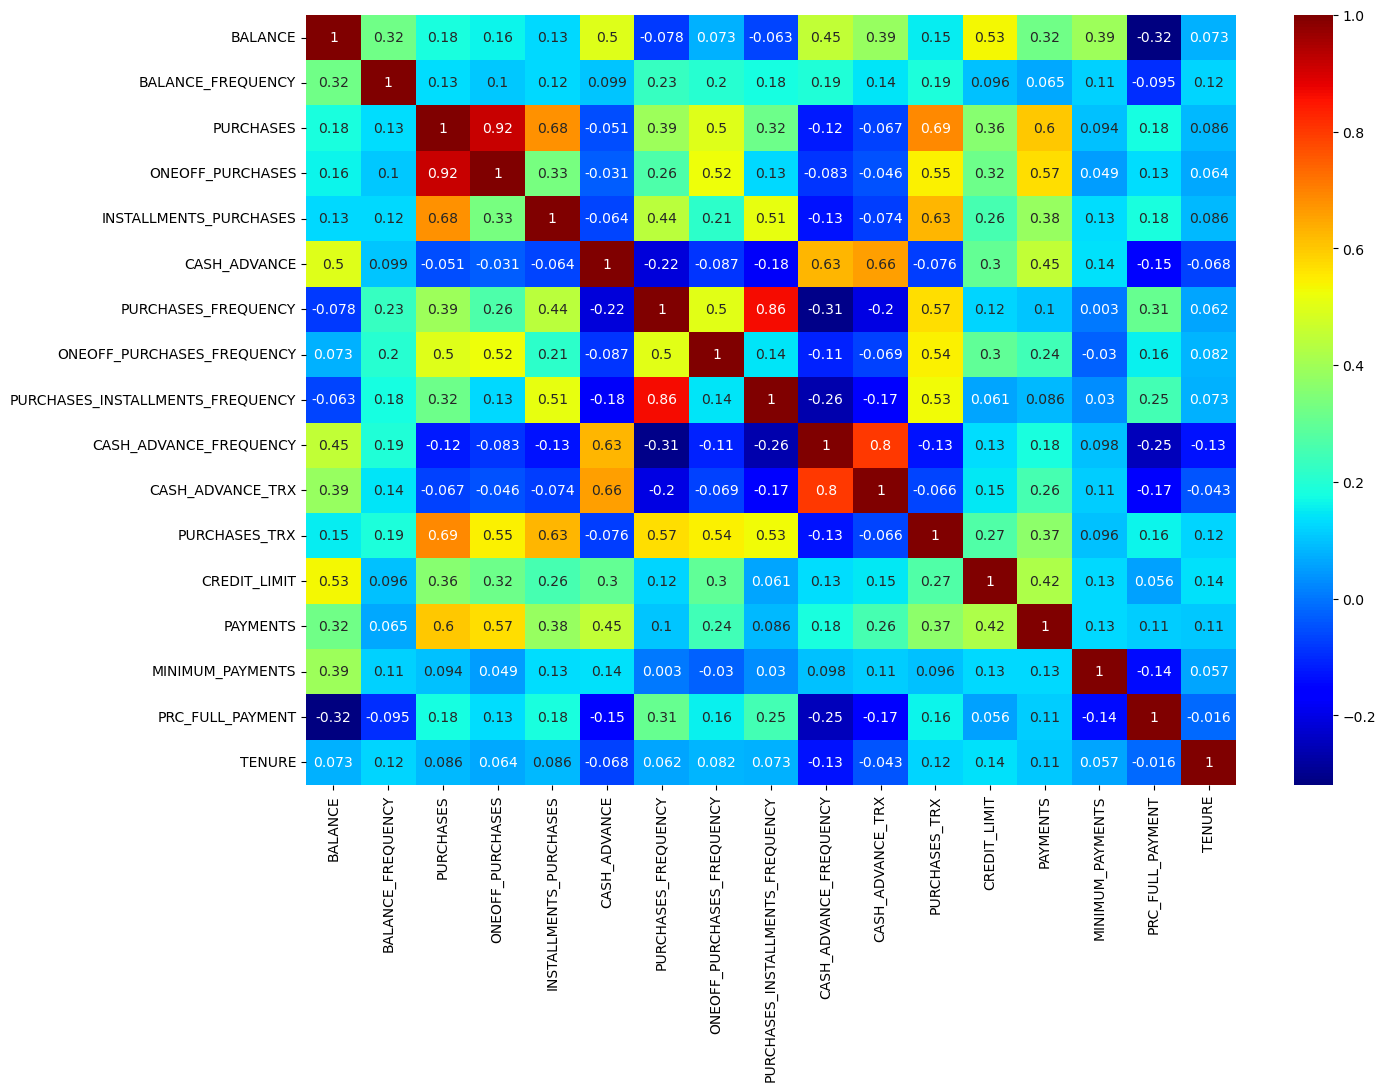

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
df_corr = numeric_df.corr()

# Visualize the correlation matrix in a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap='jet')
plt.show()

hubungan antar data terdekat pada kolom ONEOFF_PURCHASES dengan PURCHASES. Dilihat dari tingginya angka kolerasi disimpulkan bahwa ONEOFF_PURCHASES bergantung pada data PURCHASES.

### E.3 Histogram of Distribution Columns
visualisasi data menggunakan histogram untuk mudah melihat jumlah data pada setiap kolom

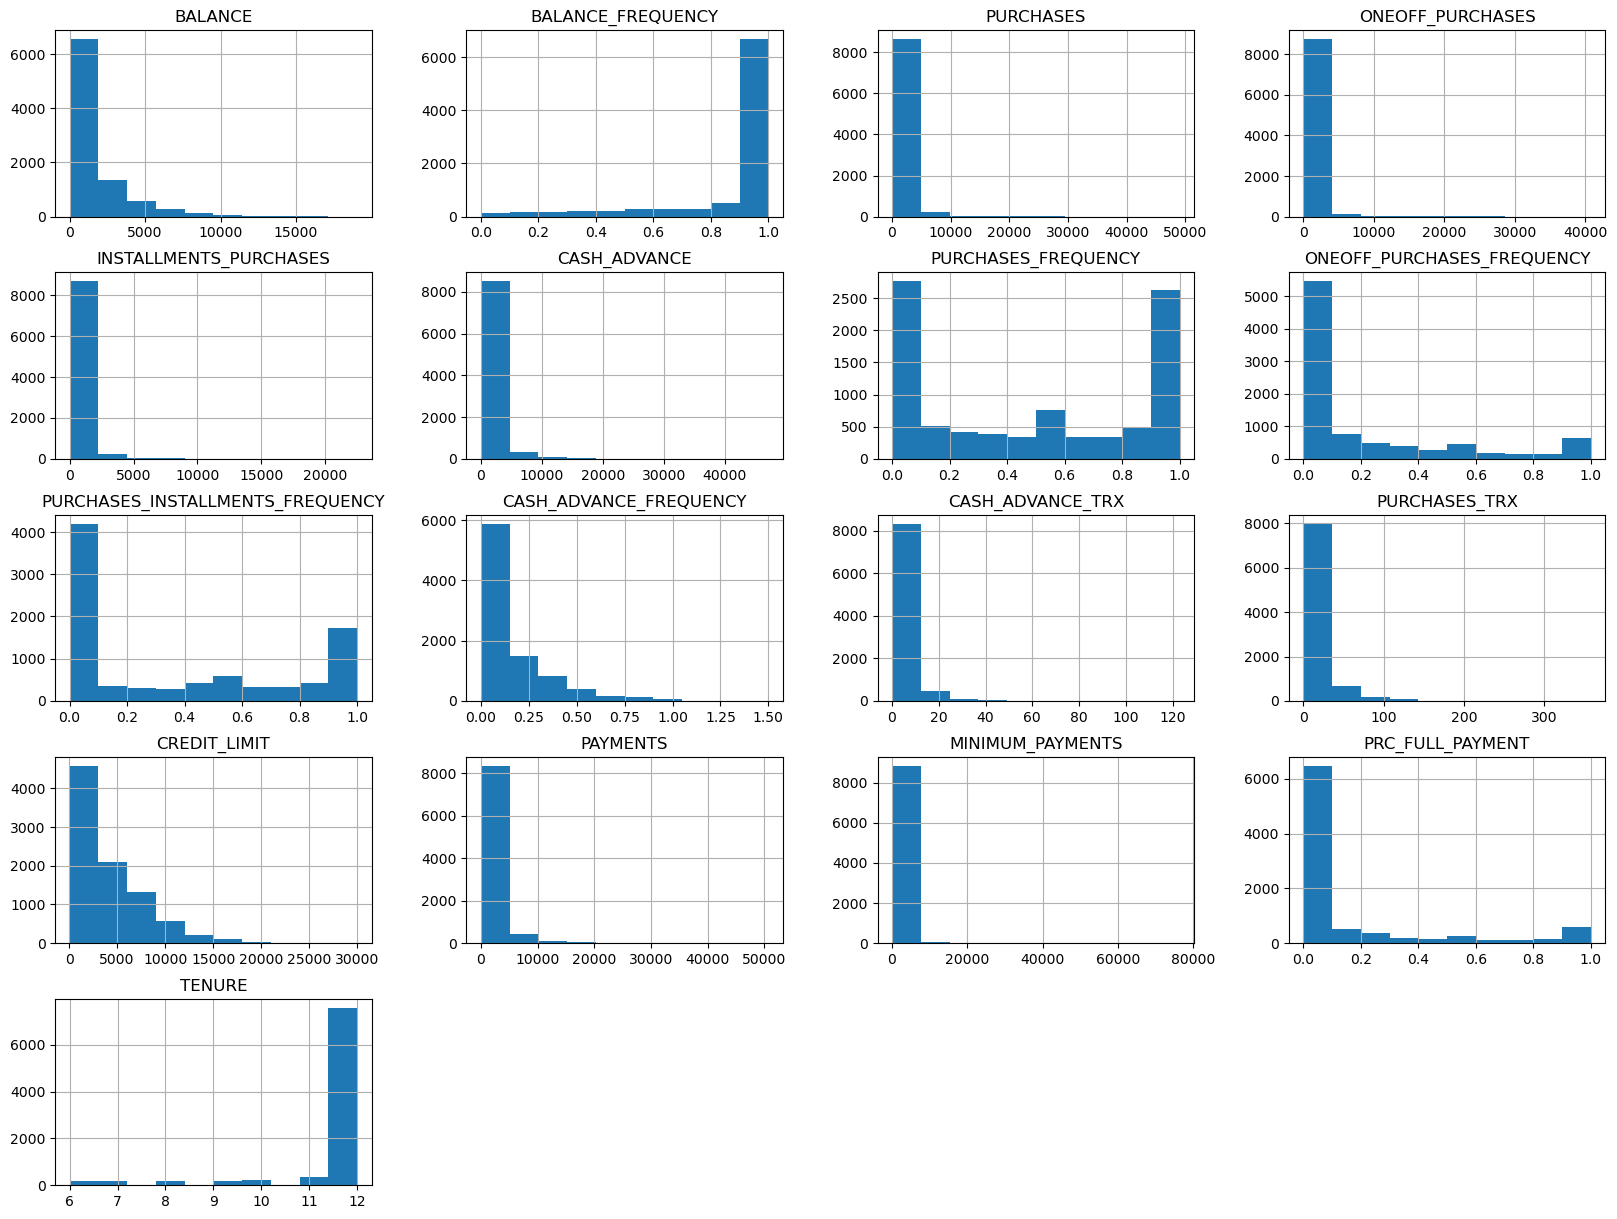

In [14]:
#Membuat histogram pada setiap kolom
df.hist(figsize=(20,15));



## F Data Preprocessing


### F.1 Remove Useless Feature (menghapus kolom fitur yang tidak dibutuhkan)
menghapus kolom CUST_ID karena dianggap tidak penting 

In [15]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

#Melihat 5 data teratas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [16]:
df_deploy = df.copy()
df_uji = df.copy()
df_copy = df.copy()
df_copy2= df.copy()

Describe Data

In [17]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### F.2 Scaling Data
Scaling data digunakan untuk menyesuaikan skala data sehingga data tersebut memiliki skala yang sama. Hal ini dilakukan untuk memastikan data dengan rentang nilai berbeda sebanding dengan model yang dilakukan.

In [18]:
a = [i for i in df.columns]

menggunakan StandardScaler dalam Normalization untuk mengubah data supaya memiliki mean 0 dan deviasi standar 1.

In [19]:
scaler = StandardScaler()
df[a] = scaler.fit_transform(df[a])
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## G. Pendefenisian Model
project ini model menggunakan Kmeans sesuai dengan objektif dari project ini

Penjelasan :

- pemilihan model Kmeans cocok dalam project ini karena model ini efisien dalam menggerjakan jumlah cluster(K)
- hasil yang diperoleh dari model Kmeans jelas dan mudah dibuat visualisasi data untuk tipe jumlah cluster(K)  

KMEANS

Membuat visualisasi data jumlah cluster dengan jarak antar cluster dalam bentuk histogram

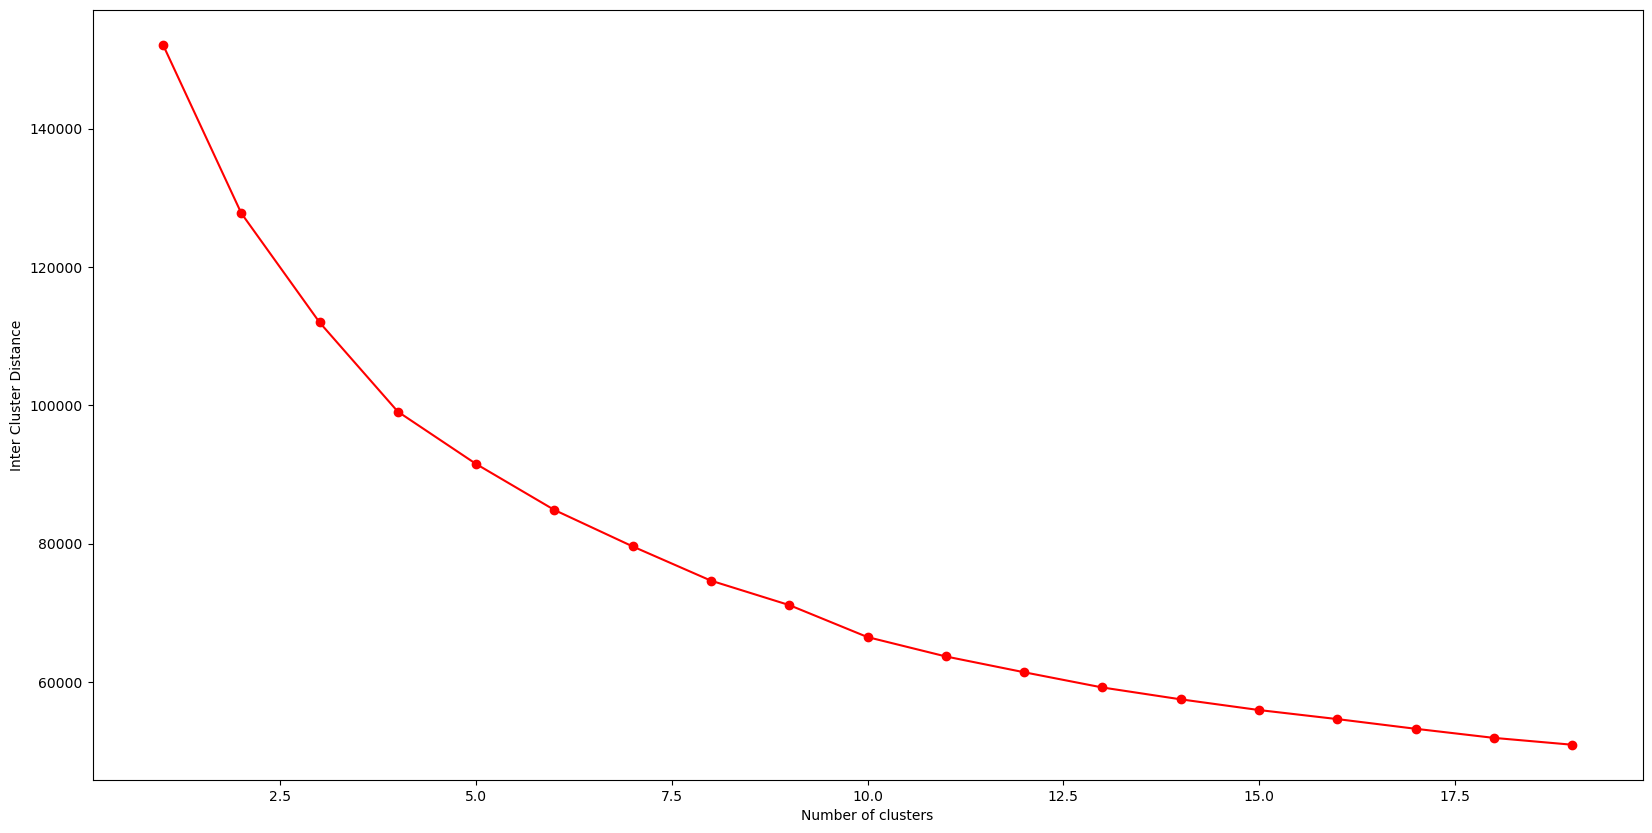

In [20]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=40)
    km.fit(df)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(20,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()



## H. Pelatihan dan pengujian model

Kmeans digunakan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kemiripan karakteristik

In [21]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=35)
model1=km.fit(df)
y_pred = km.predict(df)

membuat kolom Cluster yang sudah ditrain data

In [22]:
clus_df = pd.DataFrame(df,columns = df.columns)
clus_df['CLUSTERS'] = y_pred
clus_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,5
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,2
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,3
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,0
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,3
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,2
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,1


In [23]:
clus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

In [24]:
clus_df['CLUSTERS'].value_counts()

2    3037
3    2245
1    1315
0    1307
5     969
4      77
Name: CLUSTERS, dtype: int64

Visualisasi data yang sudah ditrain dan diuji 

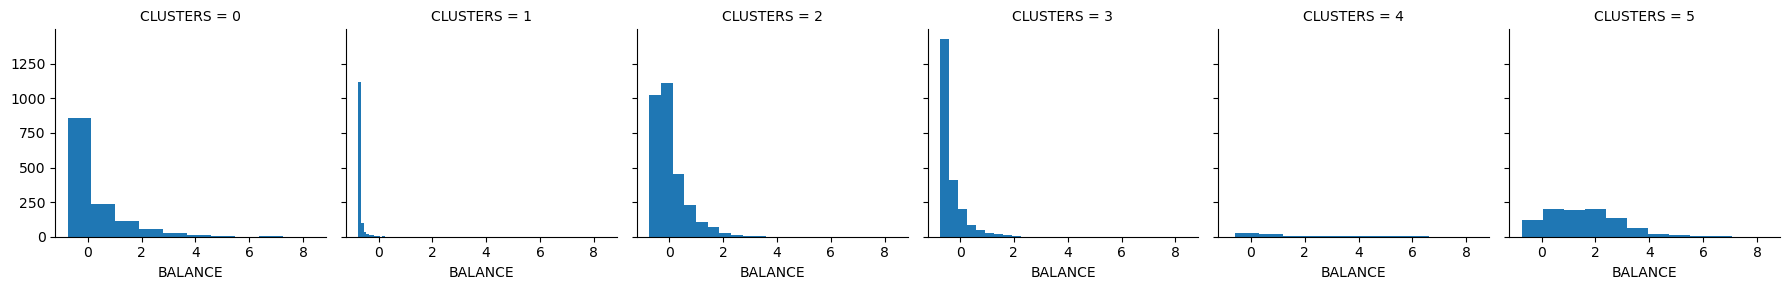

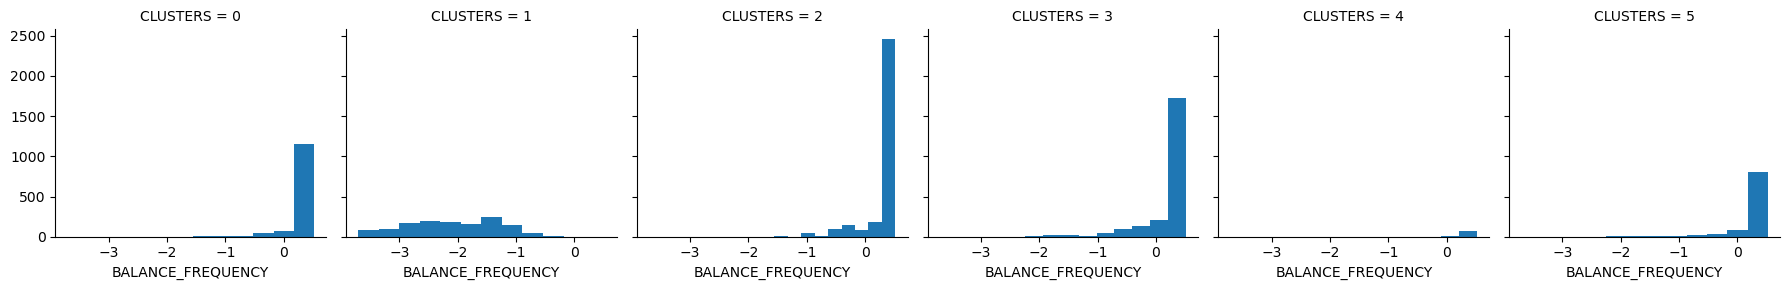

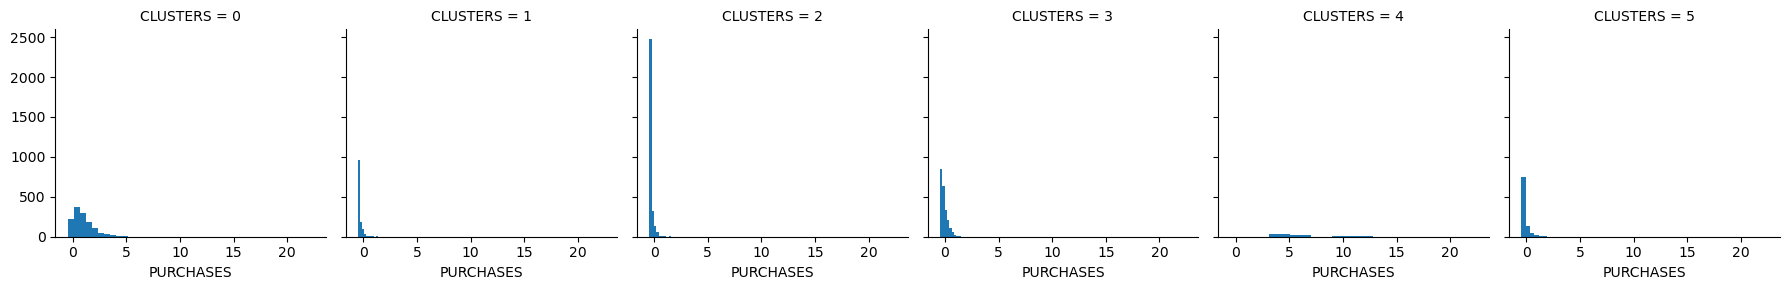

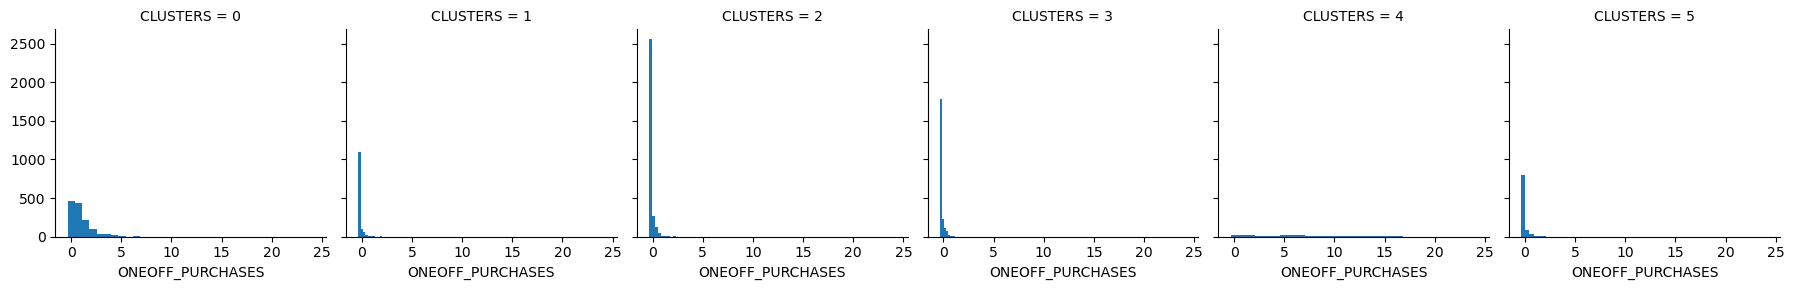

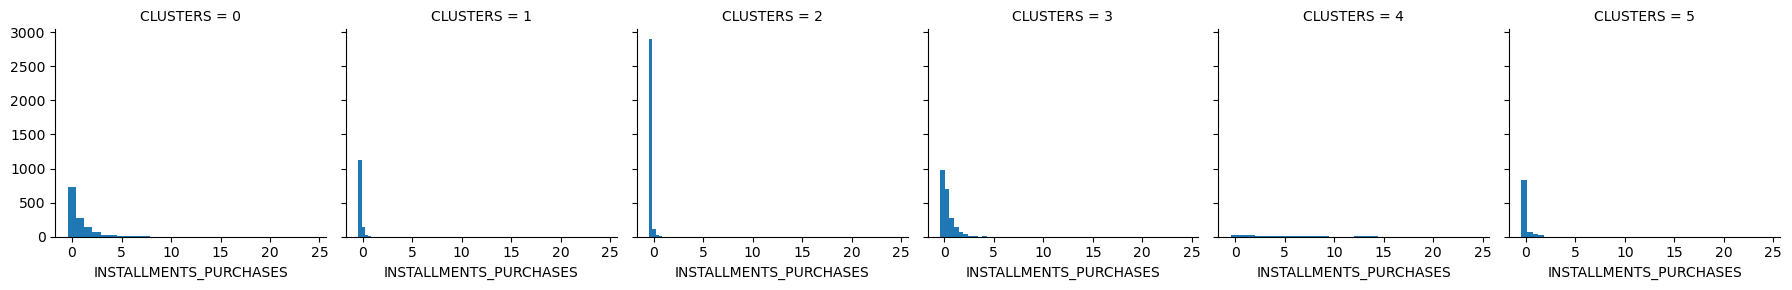

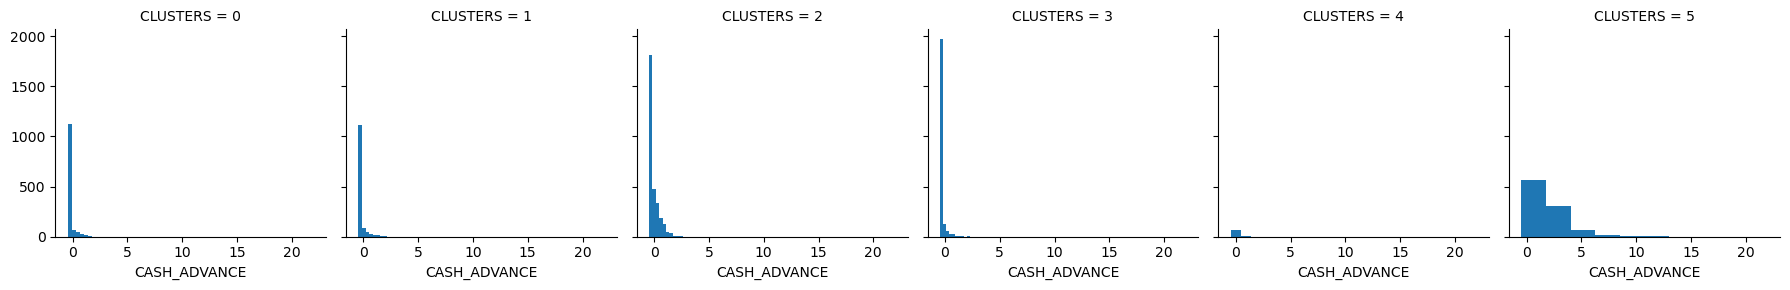

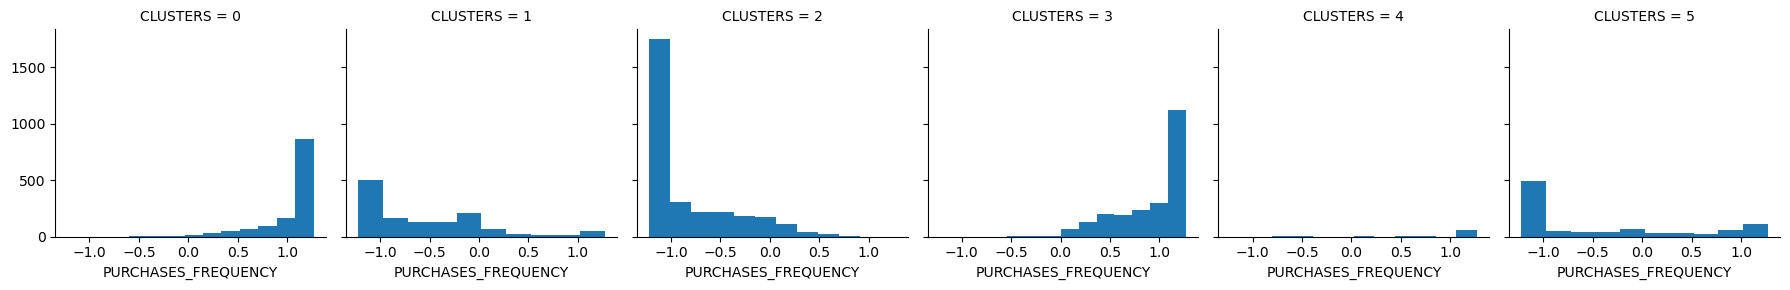

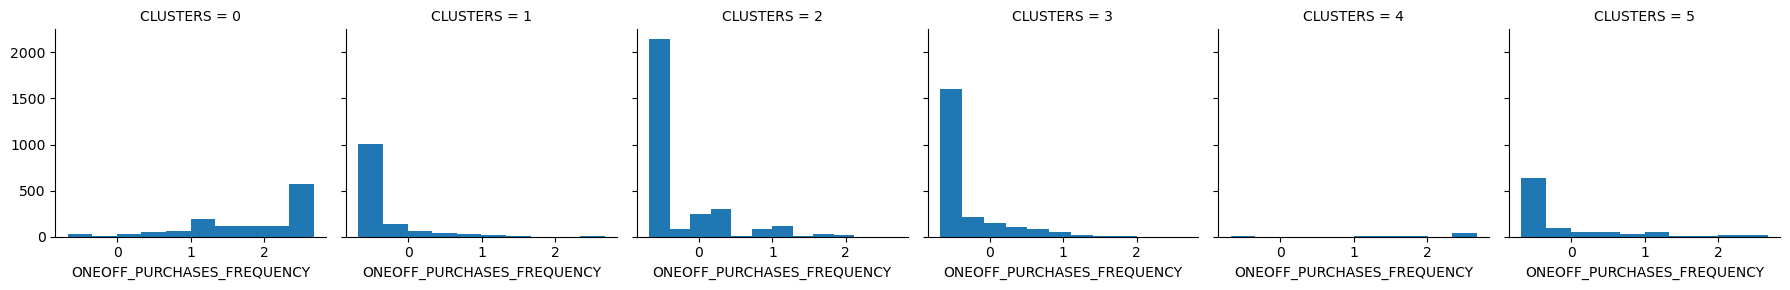

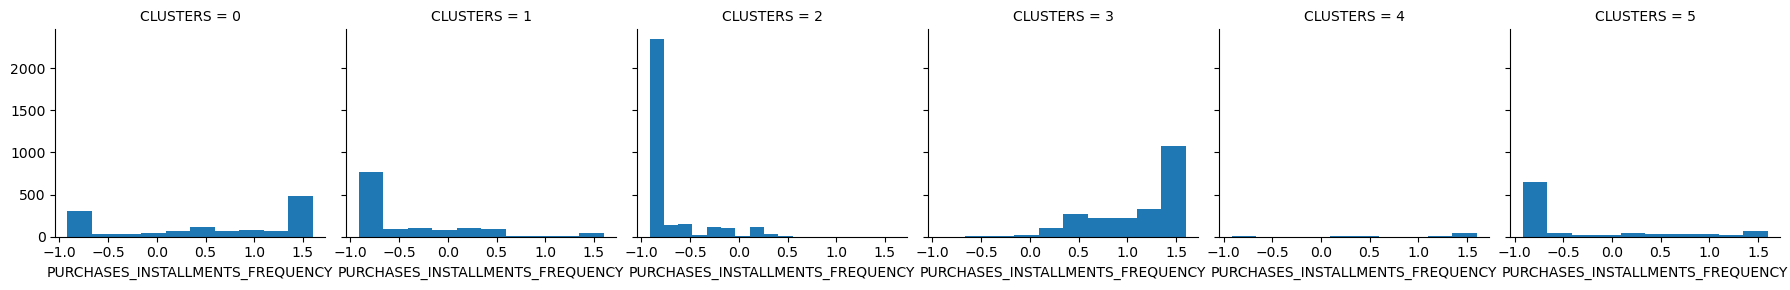

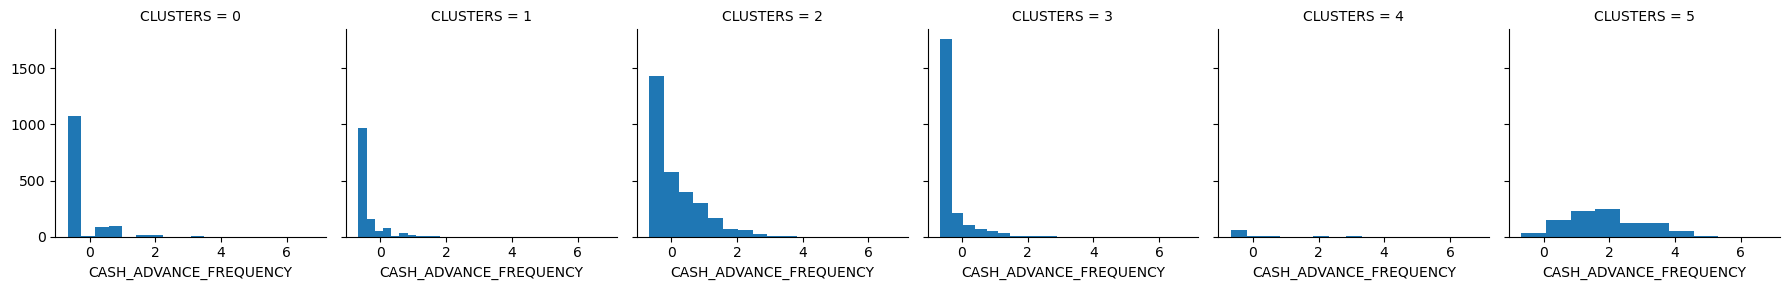

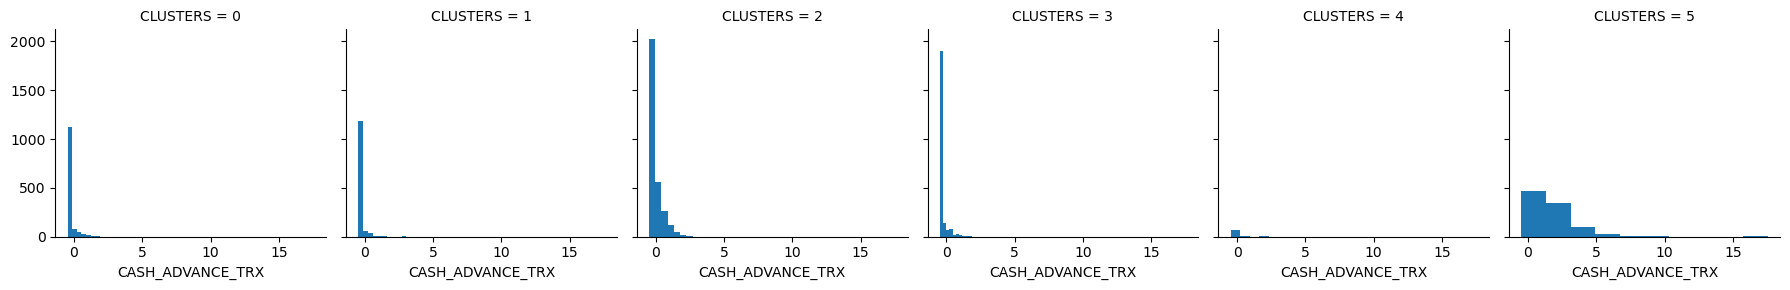

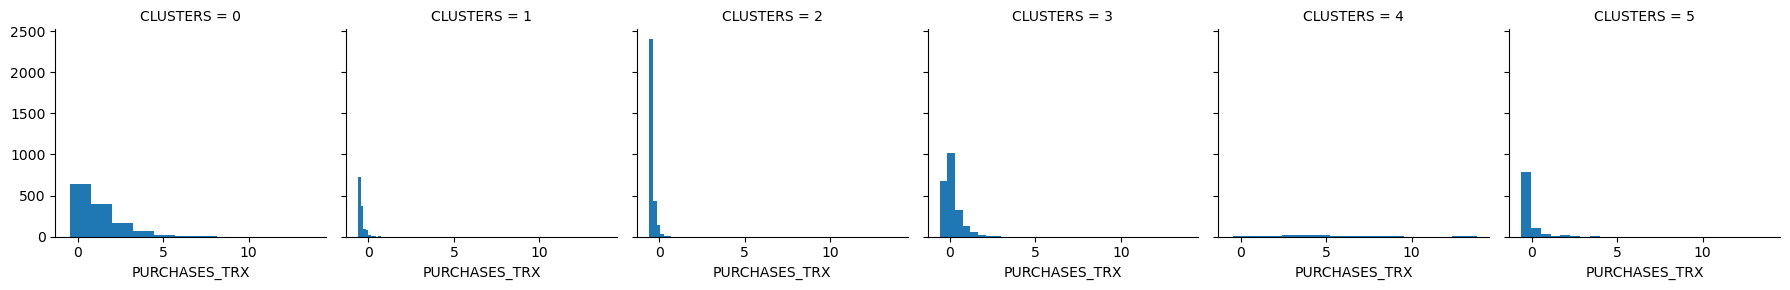

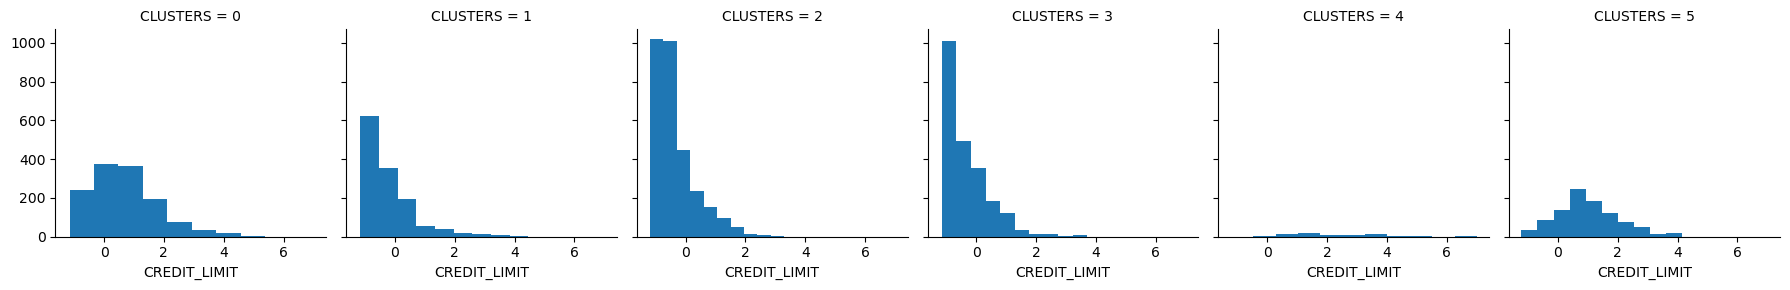

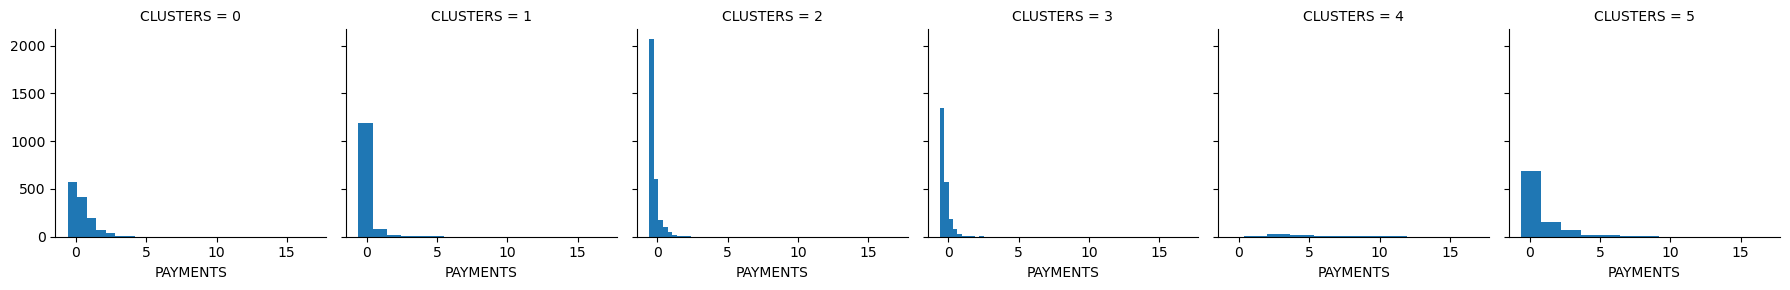

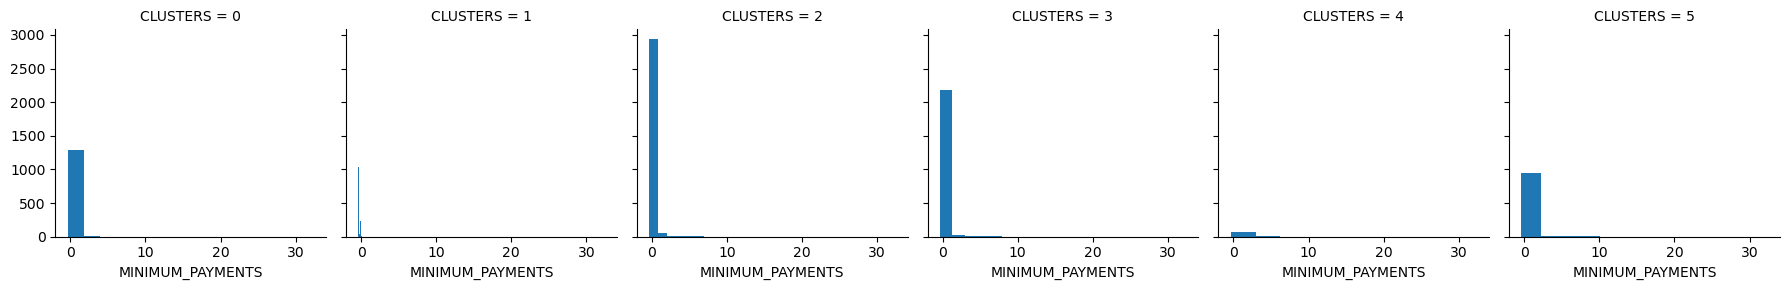

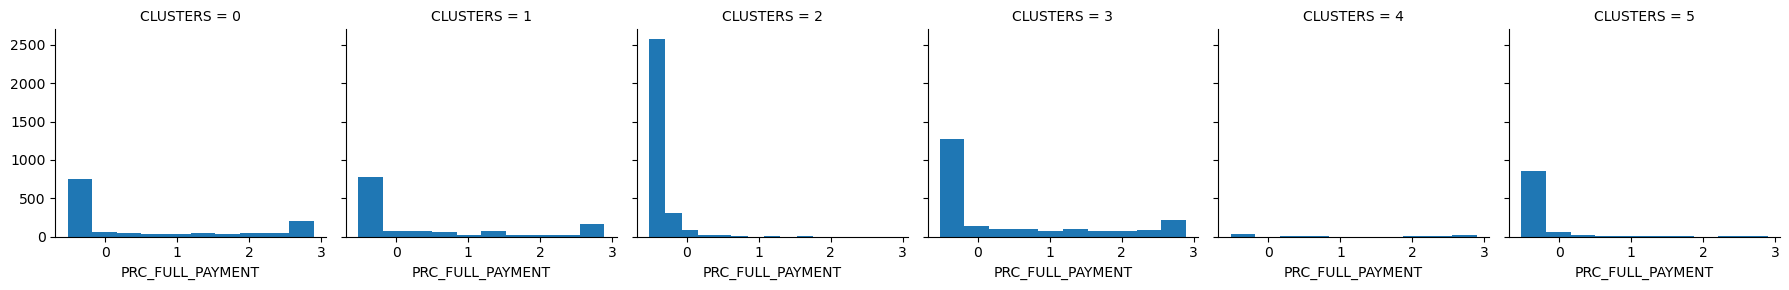

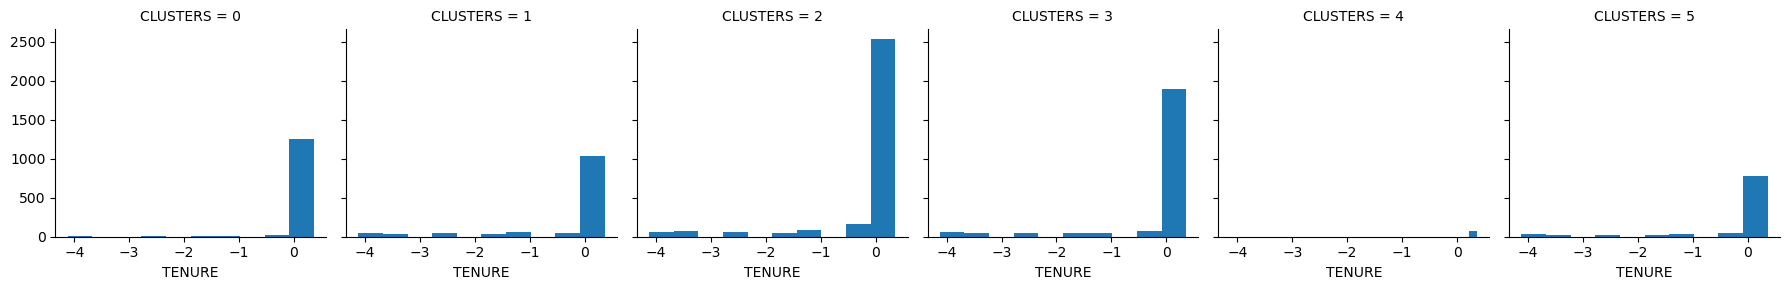

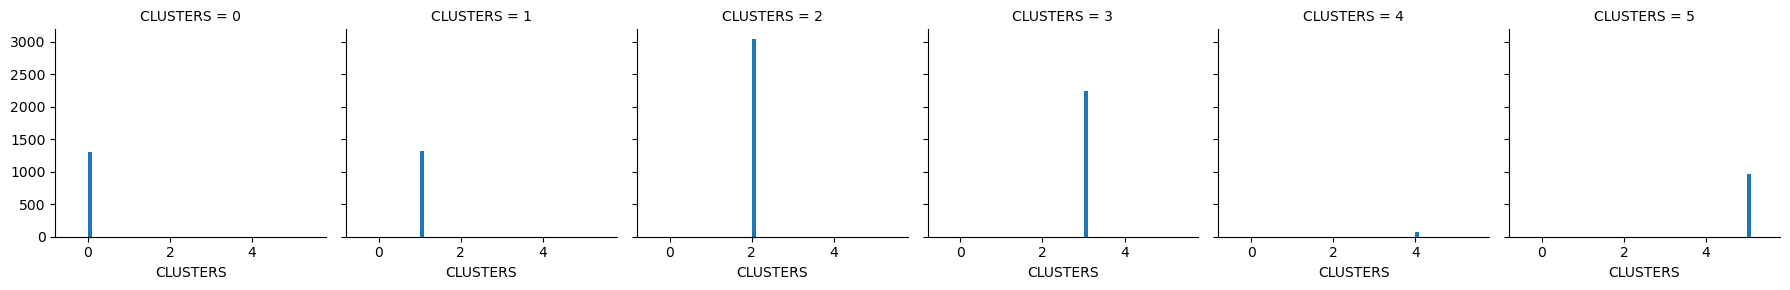

In [25]:
for c in clus_df:
    grid= sns.FacetGrid(clus_df, col='CLUSTERS')
    grid.map(plt.hist, c)



Membuat variabel X dengan beberapa kolom

In [26]:
X = clus_df[['BALANCE','PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'TENURE','PRC_FULL_PAYMENT']].to_numpy()

Visualisasi data dengan data X menggunakan histogram. untuk melihat data jumlah cluster dengan jarak antar cluster pada data X 

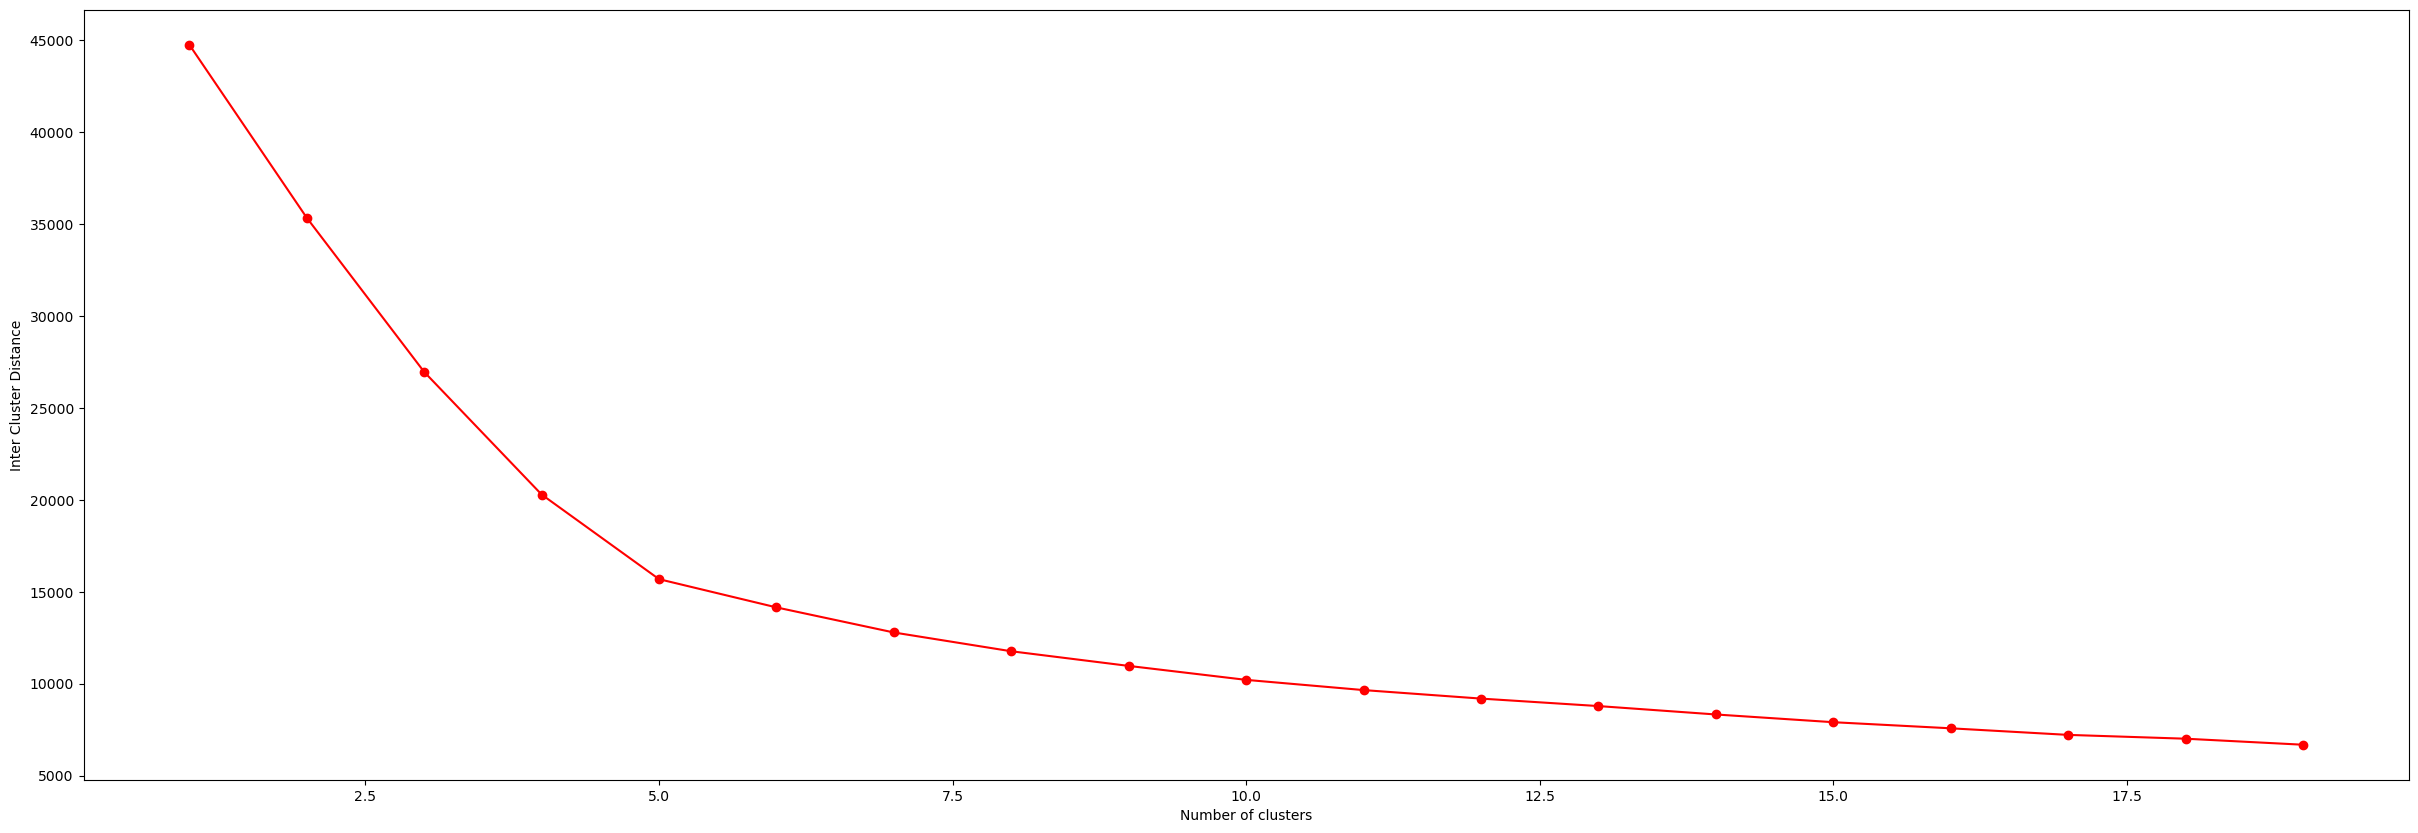

In [27]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters = clusters,init ='k-means++', max_iter=300,random_state=42)
    km.fit(X)
    interclusterdistance.append(km.inertia_)
    
#plotting the values
plt.figure(figsize=(30,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()



- Pengujian data X

In [28]:
km = KMeans(n_clusters = 6,init ='k-means++', max_iter=300,random_state=42)
model2=km.fit(X)
y_balance_pred = km.predict(X)

membuat scatter plot dengan hasil dari suatu algoritma clustering pada data X

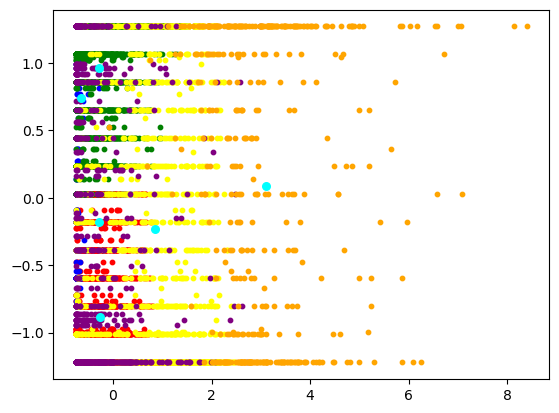

In [29]:
plt.scatter(X[y_balance_pred==0, 0], X[y_balance_pred==0, 1], s=10, c='red', label ='Cluster 1')
plt.scatter(X[y_balance_pred==1, 0], X[y_balance_pred==1, 1], s=10, c='blue', label ='Cluster 2')
plt.scatter(X[y_balance_pred==2, 0], X[y_balance_pred==2, 1], s=10, c='green', label ='Cluster 3')
plt.scatter(X[y_balance_pred==3, 0], X[y_balance_pred==3, 1], s=10, c='yellow', label ='Cluster 4')
plt.scatter(X[y_balance_pred==4, 0], X[y_balance_pred==4, 1], s=10, c='purple', label ='Cluster 5')
plt.scatter(X[y_balance_pred==5, 0], X[y_balance_pred==5, 1], s=10, c='orange', label ='Cluster 6')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=30, c='cyan', label = 'Centroids')
plt.show()



### H.1 Hierarchical Clustering

untuk mengelompokkan data ke dalam suatu struktur terorganisir berupa pohon kluster dengan cara membagi kluster secara bertahap

Normalisasi data

In [30]:
data_scaled = normalize(df_copy)
data_scaled = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


Membuat visualisasi dari data normallisasi menggunakan dendrogram

*note = visualisasi dendrogram memakan waktu lebih untuk waktu running codenya

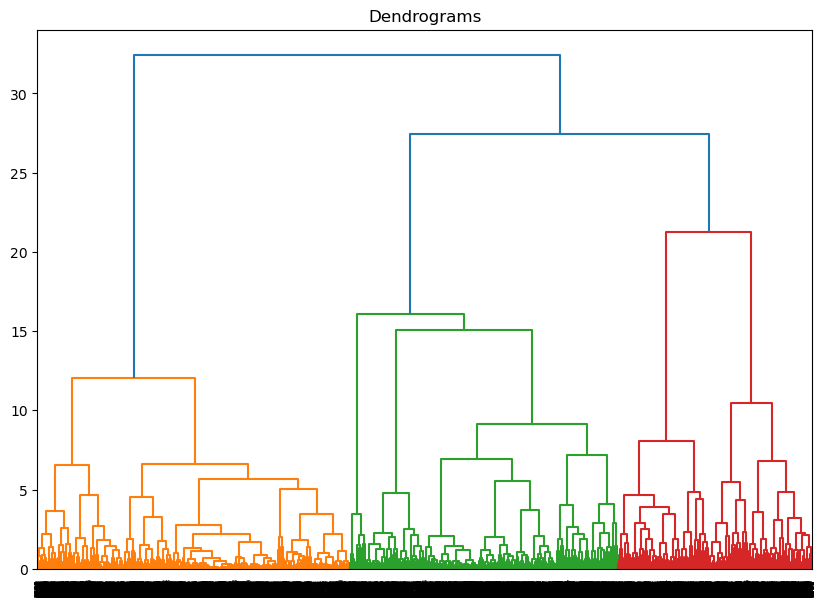

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))



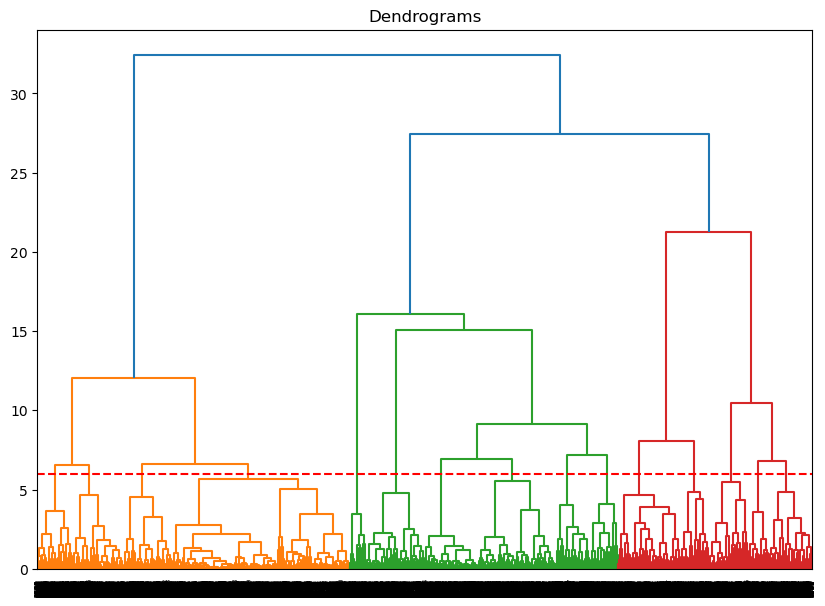

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'));
plt.axhline(y=6, color='r', linestyle='--');



Menggunakan model Hierarchical Clustering dari data normalisasi sebelumnnya

In [33]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model2 = hier.fit(data_scaled)
y_pred2 = hier.fit_predict(data_scaled)

In [34]:
hier_df = pd.DataFrame(df_copy,columns = df_copy.columns)
hier_df['CLUSTERS'] = y_pred2
hier_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [35]:
hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Visualisasi dari model Hierarchical Clustering

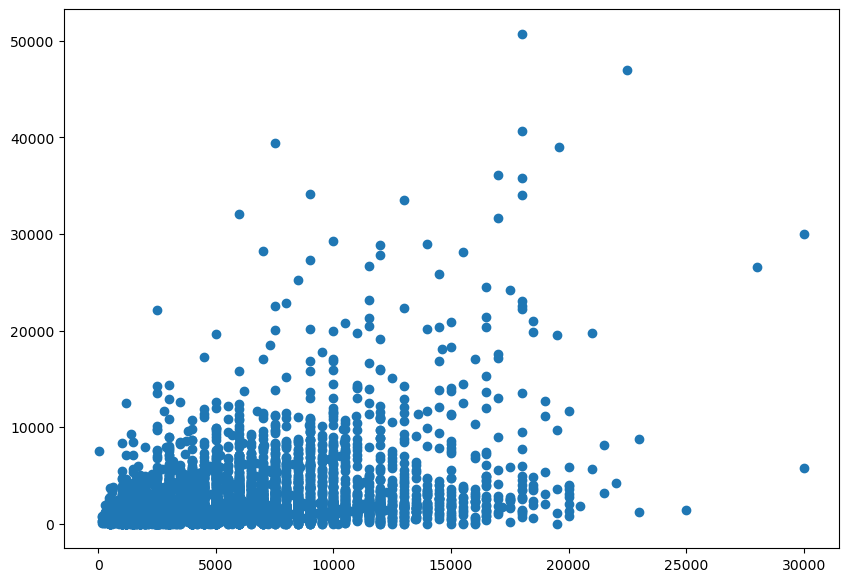

In [36]:
plt.figure(figsize=(10, 7))  
plt.scatter(hier_df['CREDIT_LIMIT'], hier_df['PAYMENTS'])



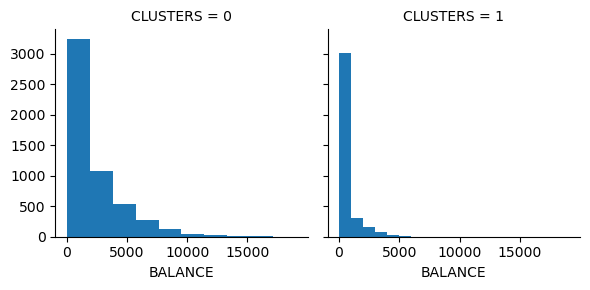

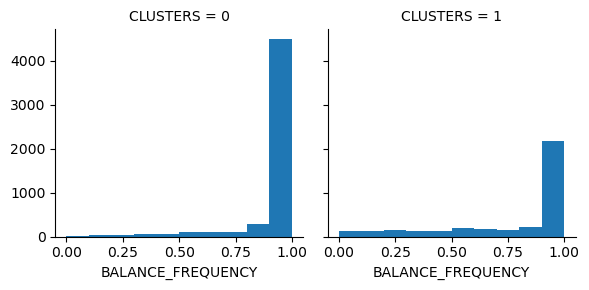

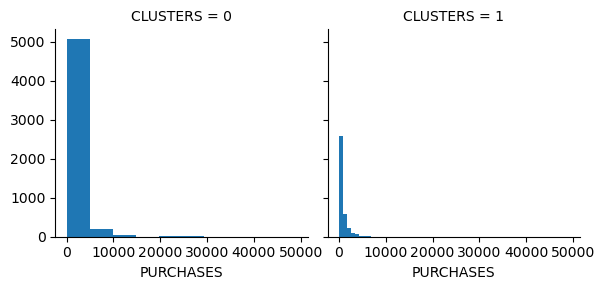

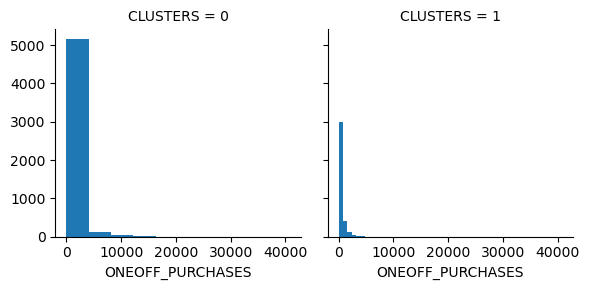

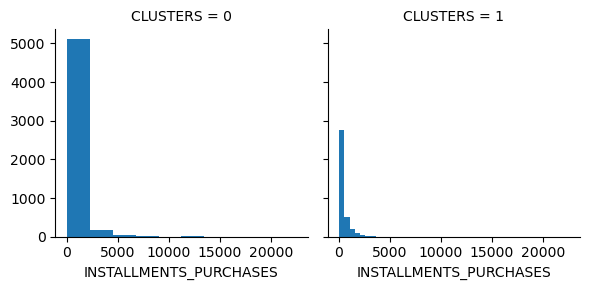

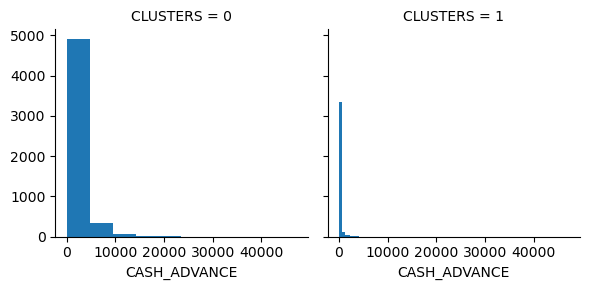

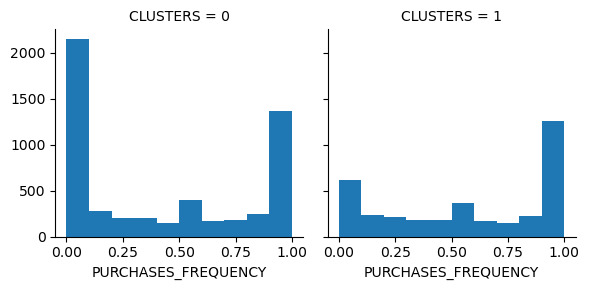

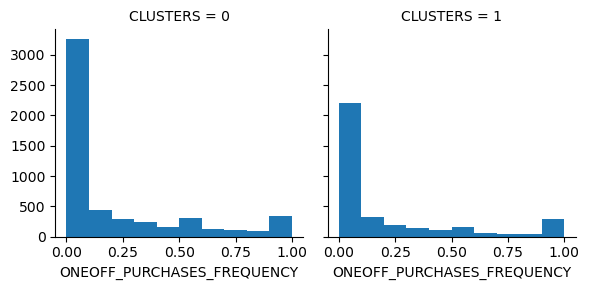

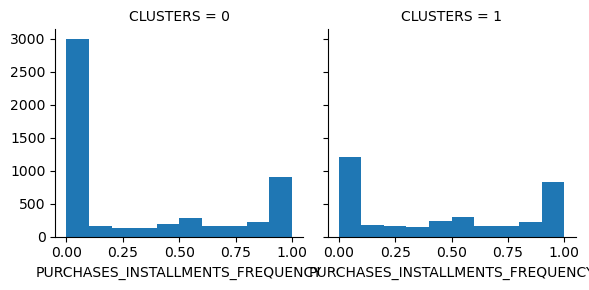

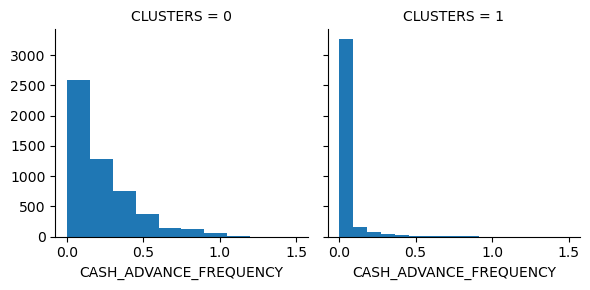

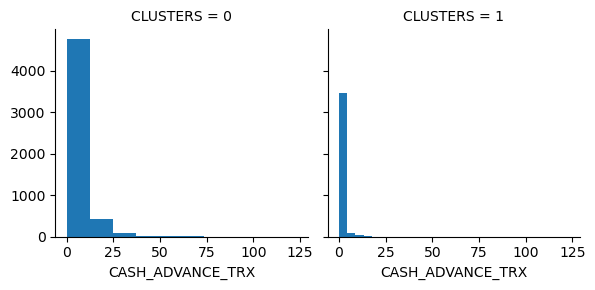

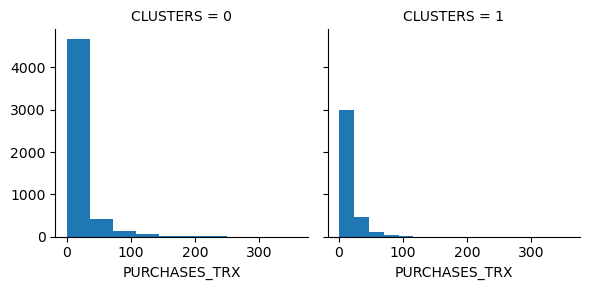

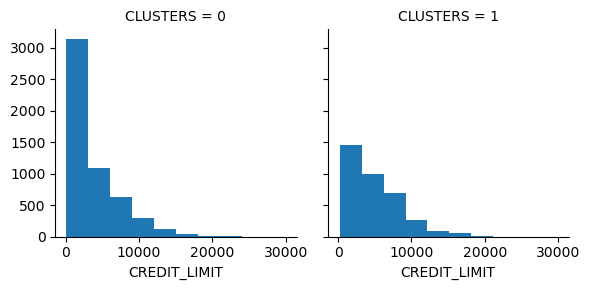

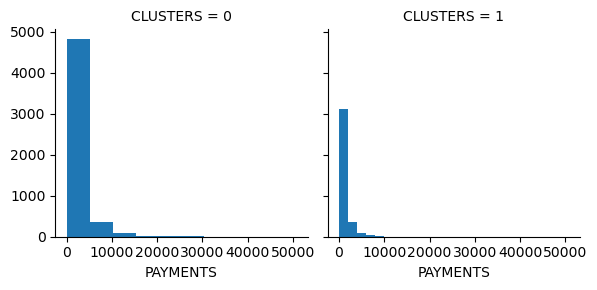

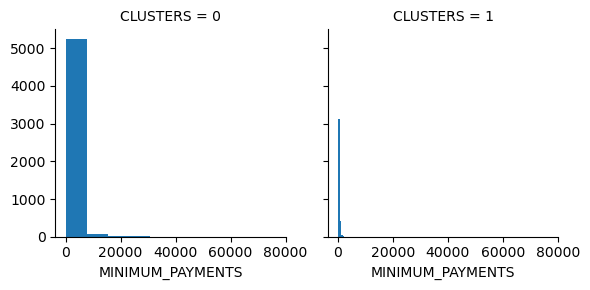

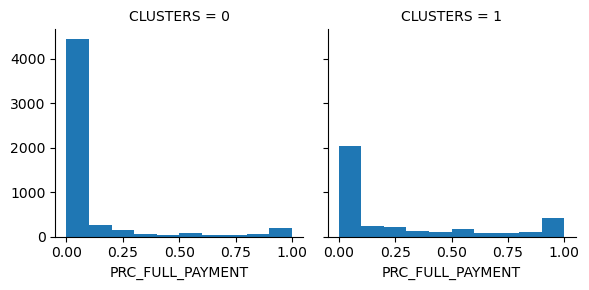

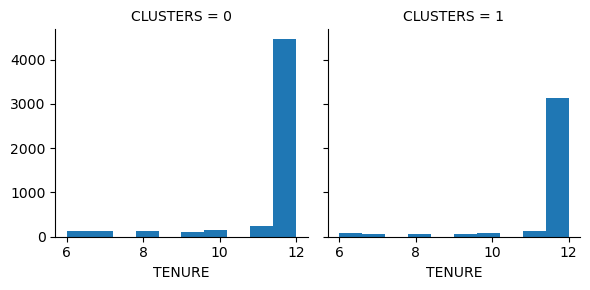

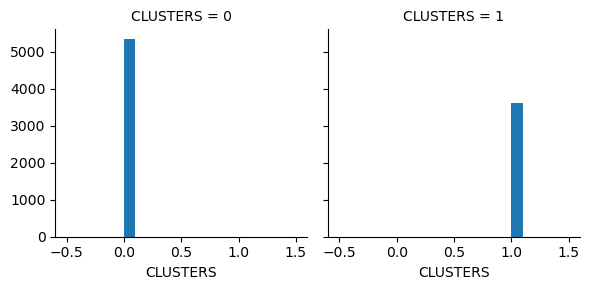

In [37]:
for c in hier_df:
    grid= sns.FacetGrid(hier_df, col='CLUSTERS')
    grid.map(plt.hist, c)
    


Visualisasi model Hierarchical Clustering menggunakan membuat dan menyimpan sebuah clustermap (peta klaster)

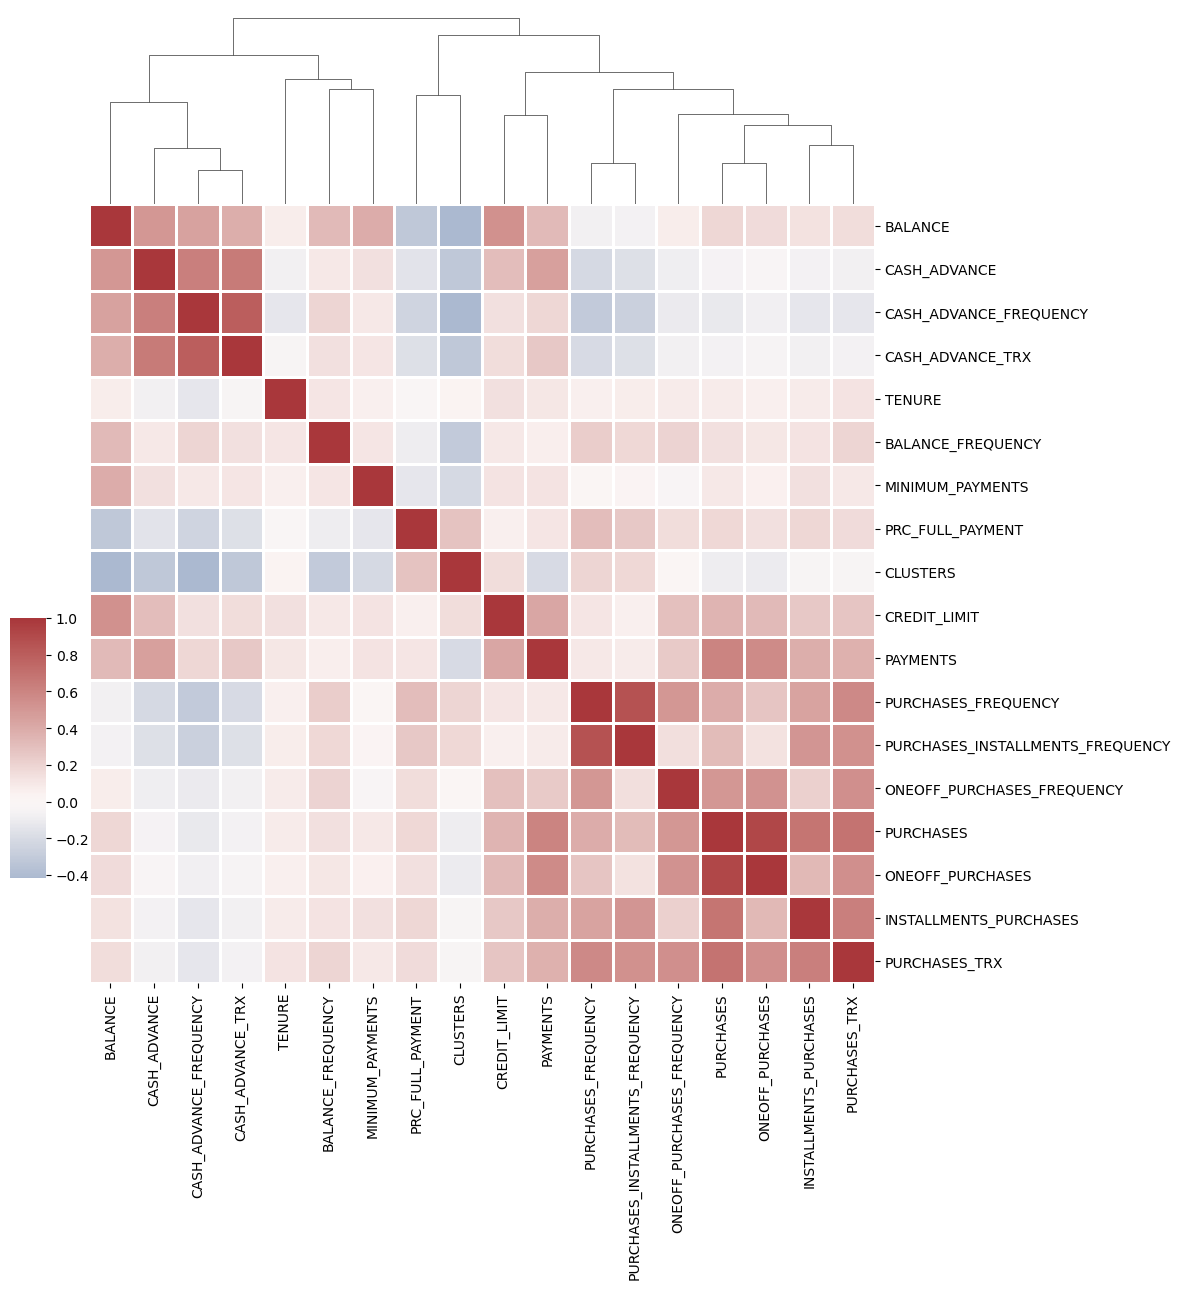

In [38]:
# Full Plot
g = sns.clustermap(hier_df.corr(), center=0, cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Remove ax row
g.ax_row_dendrogram.remove()



### H.2 DBSCAN

DBSCAN digunakan pada clustering yang bekerja berdasarkan kepadatan data. DBSCAN untuk mendeteksi pencilan

In [39]:
dbscan = DBSCAN(eps=2,min_samples=6)
df_dbscan= dbscan.fit(data_scaled)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
dbscan_df = pd.DataFrame(df_copy2,columns = df_copy2.columns)
dbscan_df['CLUSTERS'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [41]:
dbscan_df.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [42]:
dbscan_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.0
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,0.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,0.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0


In [43]:
Y = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

Pelatihan model DBSCAN

In [44]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(Y)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([-1, -1, -1, ..., -1, 85, -1], dtype=int64)

Membuat visualisasi dari model DBSCAN

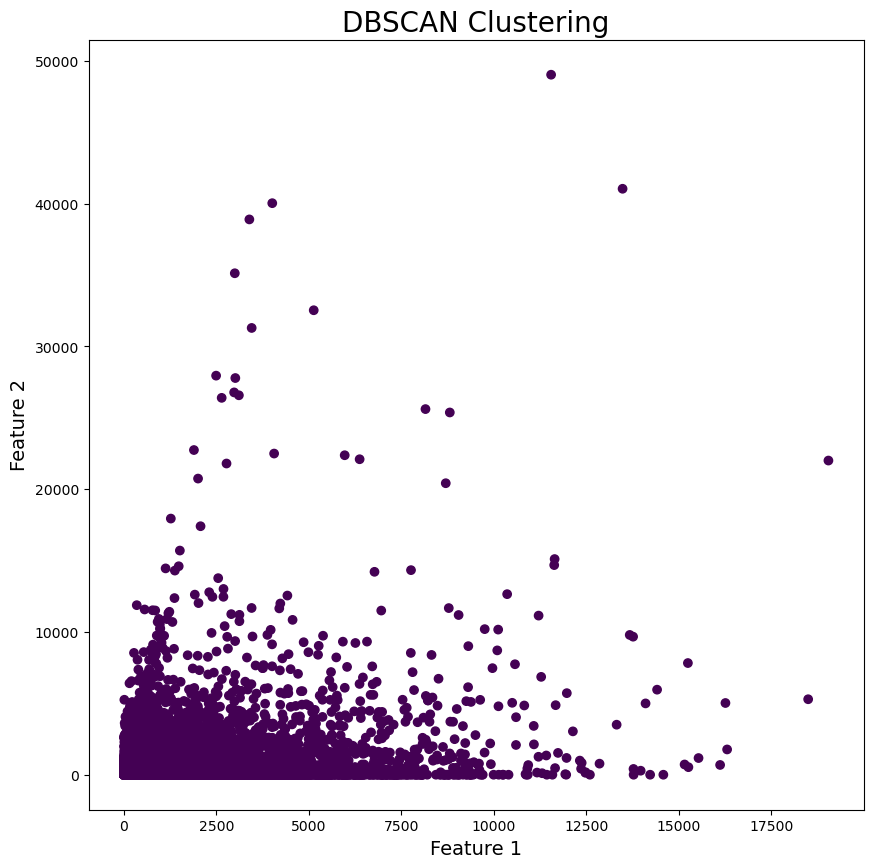

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'],dbscan_df['PURCHASES'],c=dbscan_df['CLUSTERS'])
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()



## J. Model Inference

Model inference dilakukan dengan membuat data baru. Data yang digunakan merupakan data unik dari masing-masing kolom

### J.1 Kmeans Clustering Data

In [46]:
# Melihat info dari data df_deploy
df_deploy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Kmeans numeric data

membuat kolom data TENURE yang berisi data unik dari data df_deploy

In [47]:
df_cls_TENURE = pd.DataFrame(
    {
        "TENURE":df_deploy["TENURE"].unique(),
        "TENURE_num":df_deploy["TENURE"].unique()
    }
).sort_values(by="TENURE_num", ascending=True)

df_cls_TENURE = df_cls_TENURE.set_index(keys="TENURE_num",drop=True)
df_cls_TENURE

,TENURE
TENURE_num,
6,6
7,7
8,8
9,9
10,10
11,11
12,12


PRC Full Payment

membuat kolom data PRC Full payment yang berisi data unik dari data df_deploy

In [48]:
df_cls_PRC_FULL_PAYMENT = pd.DataFrame(
    {
        "PRC_FULL_PAYMENT":df_deploy["PRC_FULL_PAYMENT"].unique(),
        "PRC_FULL_PAYMENT_num":df_deploy["PRC_FULL_PAYMENT"].unique()
    }
).sort_values(by="PRC_FULL_PAYMENT_num", ascending=True)

df_cls_PRC_FULL_PAYMENT = df_cls_PRC_FULL_PAYMENT.set_index(keys="PRC_FULL_PAYMENT_num",drop=True)
df_cls_PRC_FULL_PAYMENT

,PRC_FULL_PAYMENT
PRC_FULL_PAYMENT_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


Minimum Payments

membuat kolom data minimum payment yang berisi data unik dari data df_deploy

In [49]:
df_cls_MINIMUM_PAYMENTS = pd.DataFrame(
    {
        "MINIMUM_PAYMENTS":df_deploy["MINIMUM_PAYMENTS"].unique(),
        "MINIMUM_PAYMENTS_num":df_deploy["MINIMUM_PAYMENTS"].unique()
    }
).sort_values(by="MINIMUM_PAYMENTS_num", ascending=True)

df_cls_MINIMUM_PAYMENTS = df_cls_MINIMUM_PAYMENTS.set_index(keys="MINIMUM_PAYMENTS_num",drop=True)
df_cls_MINIMUM_PAYMENTS

,MINIMUM_PAYMENTS
MINIMUM_PAYMENTS_num,
0.019163,0.019163
0.037744,0.037744
0.055880,0.055880
0.059481,0.059481
0.117036,0.117036
...,...
43132.728230,43132.728230
50260.759470,50260.759470
56370.041170,56370.041170


Payments

membuat kolom data Payment yang berisi data unik dari data df_deploy

In [50]:
df_cls_PAYMENTS = pd.DataFrame(
    {
        "PAYMENTS":df_deploy["PAYMENTS"].unique(),
        "PAYMENTS_num":df_deploy["PAYMENTS"].unique()
    }
).sort_values(by="PAYMENTS_num", ascending=True)

df_cls_PAYMENTS = df_cls_PAYMENTS.set_index(keys="PAYMENTS_num",drop=True)
df_cls_PAYMENTS

,PAYMENTS
PAYMENTS_num,
0.000000,0.000000
0.049513,0.049513
0.056466,0.056466
2.389583,2.389583
3.500505,3.500505
...,...
39048.597620,39048.597620
39461.965800,39461.965800
40627.595240,40627.595240


Credit Limit

membuat kolom data Credit limit yang berisi data unik dari data df_deploy

In [51]:
df_cls_CREDIT_LIMIT = pd.DataFrame(
    {
        "CREDIT_LIMIT":df_deploy["CREDIT_LIMIT"].unique(),
        "CREDIT_LIMIT_num":df_deploy["CREDIT_LIMIT"].unique()
    }
).sort_values(by="CREDIT_LIMIT_num", ascending=True)

df_cls_CREDIT_LIMIT = df_cls_CREDIT_LIMIT.set_index(keys="CREDIT_LIMIT_num",drop=True)
df_cls_CREDIT_LIMIT

,CREDIT_LIMIT
CREDIT_LIMIT_num,
50.0,50.0
150.0,150.0
200.0,200.0
300.0,300.0
400.0,400.0
...,...
22500.0,22500.0
23000.0,23000.0
25000.0,25000.0


Purchases Trx

membuat kolom data Purchases TRX yang berisi data unik dari data df_deploy

In [52]:
df_cls_PURCHASES_TRX = pd.DataFrame(
    {
        "PURCHASES_TRX":df_deploy["PURCHASES_TRX"].unique(),
        "PURCHASES_TRX_num":df_deploy["PURCHASES_TRX"].unique()
    }
).sort_values(by="PURCHASES_TRX_num", ascending=True)

df_cls_PURCHASES_TRX = df_cls_PURCHASES_TRX.set_index(keys="PURCHASES_TRX_num",drop=True)
df_cls_PURCHASES_TRX

,PURCHASES_TRX
PURCHASES_TRX_num,
0,0
1,1
2,2
3,3
4,4
...,...
308,308
309,309
344,344


Cash Advance Trx

membuat kolom data Cash Advance TRX yang berisi data unik dari data df_deploy

In [53]:
df_cls_CASH_ADVANCE_TRX = pd.DataFrame(
    {
        "CASH_ADVANCE_TRX":df_deploy["CASH_ADVANCE_TRX"].unique(),
        "CASH_ADVANCE_TRX_num":df_deploy["CASH_ADVANCE_TRX"].unique()
    }
).sort_values(by="CASH_ADVANCE_TRX_num", ascending=True)

df_cls_CASH_ADVANCE_TRX = df_cls_CASH_ADVANCE_TRX.set_index(keys="CASH_ADVANCE_TRX_num",drop=True)
df_cls_CASH_ADVANCE_TRX

,CASH_ADVANCE_TRX
CASH_ADVANCE_TRX_num,
0,0
1,1
2,2
3,3
4,4
...,...
80,80
93,93
107,107


Cash Advance Frequency

membuat kolom data Cash Advance Frequency yang berisi data unik dari data df_deploy

In [54]:
df_cls_CASH_ADVANCE_FREQUENCY = pd.DataFrame(
    {
        "CASH_ADVANCE_FREQUENCY":df_deploy["CASH_ADVANCE_FREQUENCY"].unique(),
        "CASH_ADVANCE_FREQUENCY_num":df_deploy["CASH_ADVANCE_FREQUENCY"].unique()
    }
).sort_values(by="CASH_ADVANCE_FREQUENCY_num", ascending=True)

df_cls_CASH_ADVANCE_FREQUENCY = df_cls_CASH_ADVANCE_FREQUENCY.set_index(keys="CASH_ADVANCE_FREQUENCY_num",drop=True)
df_cls_CASH_ADVANCE_FREQUENCY

,CASH_ADVANCE_FREQUENCY
CASH_ADVANCE_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


Purchases Installments Frequency

membuat kolom data Purchases Installments Frequency yang berisi data unik dari data df_deploy

In [55]:
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_INSTALLMENTS_FREQUENCY":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique(),
        "PURCHASES_INSTALLMENTS_FREQUENCY_num":df_deploy["PURCHASES_INSTALLMENTS_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_INSTALLMENTS_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_INSTALLMENTS_FREQUENCY = df_cls_PURCHASES_INSTALLMENTS_FREQUENCY.set_index(keys="PURCHASES_INSTALLMENTS_FREQUENCY_num",drop=True)
df_cls_PURCHASES_INSTALLMENTS_FREQUENCY

,PURCHASES_INSTALLMENTS_FREQUENCY
PURCHASES_INSTALLMENTS_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


OneOff Purchases Frequency

membuat kolom data OneOff Purchases Fruequency yang berisi data unik dari data df_deploy

In [56]:
df_cls_ONEOFF_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "ONEOFF_PURCHASES_FREQUENCY":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique(),
        "ONEOFF_PURCHASES_FREQUENCY_num":df_deploy["ONEOFF_PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_FREQUENCY_num", ascending=True)

df_cls_ONEOFF_PURCHASES_FREQUENCY = df_cls_ONEOFF_PURCHASES_FREQUENCY.set_index(keys="ONEOFF_PURCHASES_FREQUENCY_num",drop=True)
df_cls_ONEOFF_PURCHASES_FREQUENCY

,ONEOFF_PURCHASES_FREQUENCY
ONEOFF_PURCHASES_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


Purchases Frequency

membuat kolom data Purchases Frequency yang berisi data unik dari data df_deploy

In [57]:
df_cls_PURCHASES_FREQUENCY = pd.DataFrame(
    {
        "PURCHASES_FREQUENCY":df_deploy["PURCHASES_FREQUENCY"].unique(),
        "PURCHASES_FREQUENCY_num":df_deploy["PURCHASES_FREQUENCY"].unique()
    }
).sort_values(by="PURCHASES_FREQUENCY_num", ascending=True)

df_cls_PURCHASES_FREQUENCY = df_cls_PURCHASES_FREQUENCY.set_index(keys="PURCHASES_FREQUENCY_num",drop=True)
df_cls_PURCHASES_FREQUENCY

,PURCHASES_FREQUENCY
PURCHASES_FREQUENCY_num,
0.000000,0.000000
0.083333,0.083333
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818


Cash advance

membuat kolom data Cash Advance yang berisi data unik dari data df_deploy

In [58]:
df_cls_CASH_ADVANCE = pd.DataFrame(
    {
        "CASH_ADVANCE":df_deploy["CASH_ADVANCE"].unique(),
        "CASH_ADVANCE_num":df_deploy["CASH_ADVANCE"].unique()
    }
).sort_values(by="CASH_ADVANCE_num", ascending=True)

df_cls_CASH_ADVANCE = df_cls_CASH_ADVANCE.set_index(keys="CASH_ADVANCE_num",drop=True)
df_cls_CASH_ADVANCE

,CASH_ADVANCE
CASH_ADVANCE_num,
0.000000,0.000000
14.222216,14.222216
18.042768,18.042768
18.117967,18.117967
18.123413,18.123413
...,...
26194.049540,26194.049540
26268.699890,26268.699890
27296.485760,27296.485760


Installments Purchases

membuat kolom data Installments Purchases yang berisi data unik dari data df_deploy

In [59]:
df_cls_INSTALLMENTS_PURCHASES = pd.DataFrame(
    {
        "INSTALLMENTS_PURCHASES":df_deploy["INSTALLMENTS_PURCHASES"].unique(),
        "INSTALLMENTS_PURCHASES_num":df_deploy["INSTALLMENTS_PURCHASES"].unique()
    }
).sort_values(by="INSTALLMENTS_PURCHASES_num", ascending=True)

df_cls_INSTALLMENTS_PURCHASES = df_cls_INSTALLMENTS_PURCHASES.set_index(keys="INSTALLMENTS_PURCHASES_num",drop=True)
df_cls_INSTALLMENTS_PURCHASES

,INSTALLMENTS_PURCHASES
INSTALLMENTS_PURCHASES_num,
0.00,0.00
1.95,1.95
4.44,4.44
4.80,4.80
6.33,6.33
...,...
12738.47,12738.47
13184.43,13184.43
14686.10,14686.10


OneOff Purchases

membuat kolom data OneOff Purchases yang berisi data unik dari data df_deploy

In [60]:
df_cls_ONEOFF_PURCHASES = pd.DataFrame(
    {
        "ONEOFF_PURCHASES":df_deploy["ONEOFF_PURCHASES"].unique(),
        "ONEOFF_PURCHASES_num":df_deploy["ONEOFF_PURCHASES"].unique()
    }
).sort_values(by="ONEOFF_PURCHASES_num", ascending=True)

df_cls_ONEOFF_PURCHASES = df_cls_ONEOFF_PURCHASES.set_index(keys="ONEOFF_PURCHASES_num",drop=True)
df_cls_ONEOFF_PURCHASES

,ONEOFF_PURCHASES
ONEOFF_PURCHASES_num,
0.00,0.00
0.01,0.01
0.02,0.02
0.05,0.05
0.24,0.24
...,...
26547.43,26547.43
33803.84,33803.84
34087.73,34087.73


Purchases

membuat kolom data Purchases yang berisi data unik dari data df_deploy

In [61]:
df_cls_PURCHASES = pd.DataFrame(
    {
        "PURCHASES":df_deploy["PURCHASES"].unique(),
        "purchases_num":df_deploy["PURCHASES"].unique()
    }
).sort_values(by="purchases_num", ascending=True)

df_cls_PURCHASES = df_cls_PURCHASES.set_index(keys="purchases_num",drop=True)
df_cls_PURCHASES

,PURCHASES
purchases_num,
0.00,0.00
0.01,0.01
0.05,0.05
0.24,0.24
0.70,0.70
...,...
35131.16,35131.16
38902.71,38902.71
40040.71,40040.71


Balance Frequency

membuat kolom data Balance Frequency yang berisi data unik dari data df_deploy

In [62]:
df_cls_balancefreq = pd.DataFrame(
    {
        "BALANCE_FREQUENCY":df_deploy["BALANCE_FREQUENCY"].unique(),
        "balancefreq_num":df_deploy["BALANCE_FREQUENCY"].unique()
    }
).sort_values(by="balancefreq_num", ascending=True)

df_cls_balancefreq = df_cls_balancefreq.set_index(keys="balancefreq_num",drop=True)
df_cls_balancefreq

,BALANCE_FREQUENCY
balancefreq_num,
0.000000,0.000000
0.090909,0.090909
0.100000,0.100000
0.111111,0.111111
0.125000,0.125000
0.142857,0.142857
0.166667,0.166667
0.181818,0.181818
0.200000,0.200000


Balance

membuat kolom data Balnce yang berisi data unik dari data df_deploy

In [63]:
df_cls_balance = pd.DataFrame(
    {
        "BALANCE":df_deploy["BALANCE"].unique(),
        "balance_num":df_deploy["BALANCE"].unique()
    }
).sort_values(by="balance_num", ascending=True)

df_cls_balance = df_cls_balance.set_index(keys="balance_num",drop=True)
df_cls_balance

,BALANCE
balance_num,
0.000000,0.000000
0.000199,0.000199
0.001146,0.001146
0.001214,0.001214
0.001289,0.001289
...,...
16115.596400,16115.596400
16259.448570,16259.448570
16304.889250,16304.889250


In [64]:
df_deploy.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


### J.2 Pengujian model interfrence

In [65]:
BALANCE = float(input("BALANCE: "))
BALANCE_FREQUENCY = float(input("BALANCE_FREQUENCY: "))
PURCHASES = float(input("PURCHASES: "))
ONEOFF_PURCHASES = float(input("ONEOFF_PURCHASES: "))
INSTALLMENTS_PURCHASES = float(input("INSTALLMENTS_PURCHASES: "))
CASH_ADVANCE = float(input("CASH_ADVANCE: "))
PURCHASES_FREQUENCY = float(input("PURCHASES_FREQUENCY: "))
ONEOFF_PURCHASES_FREQUENCY = float(input("ONEOFF_PURCHASES_FREQUENCY: "))
PURCHASES_INSTALLMENTS_FREQUENCY = float(input("PURCHASES_INSTALLMENTS_FREQUENCY: "))
CASH_ADVANCE_FREQUENCY = float(input("CASH_ADVANCE_FREQUENCY: "))
CASH_ADVANCE_TRX = float(input("CASH_ADVANCE_TRX: "))
PURCHASES_TRX = float(input("PURCHASES_TRX: "))
CREDIT_LIMIT = float(input("CREDIT_LIMIT: "))
PAYMENTS = float(input("PAYMENTS: "))
MINIMUM_PAYMENTS = float(input("MINIMUM_PAYMENTS: "))
PRC_FULL_PAYMENT = float(input("PRC_FULL_PAYMENT: "))
TENURE = float(input("TENURE: "))

feature = [
    BALANCE,
    BALANCE_FREQUENCY,
    PURCHASES,
    ONEOFF_PURCHASES,
    INSTALLMENTS_PURCHASES,
    CASH_ADVANCE,
    PURCHASES_FREQUENCY,
    ONEOFF_PURCHASES_FREQUENCY,
    PURCHASES_INSTALLMENTS_FREQUENCY,
    CASH_ADVANCE_FREQUENCY,
    CASH_ADVANCE_TRX,
    PURCHASES_TRX,
    CREDIT_LIMIT,
    PAYMENTS,
    MINIMUM_PAYMENTS,
    PRC_FULL_PAYMENT,
    TENURE
]

feature = scaler.fit_transform([feature])
predict = model1.predict(feature)

print("Cluster : ",predict)

Cluster :  [2]


In [66]:
# sebagai acuan pengisian model inference
df_deploy.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12


K-Means Clustering - Model Inference

In [67]:
pickle.dump(model1, open('model_km.pkl','wb'))

Hierarchy Clustering - Model Inference

In [68]:
pickle.dump(hier, open('model_hier.pkl','wb'))

DBScan Clustering - Model Inference

In [69]:
pickle.dump(dbscan, open('model_dbscan.pkl','wb'))

Scaller - Model Inference

In [70]:
pickle.dump(scaler, open('scaler_model.pkl','wb'))

## K Pengambilan Kesimpulan

### Berikut adalah potongan dari sesi Pengenalan project

- Objective yang ingin dicapai :
  - Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
  - Mampu mempersiapkan data untuk digunakan dalam Clustering
  - Mampu mengimplementasikan Clustering pada data yang diberikan



- Hasil yang diharapkan :
    - Model dapat melakukan clustering dari data yang disajikan guna membuat customer segementation untuk marketing strategy


### Kesimpulan

- Berdasarkan objektif yang ingin dicapai:
    - Kelompok 4 KS18 berhasil memahami konsep machine learning yaitu Clustering data menggunakan library Scikit-Learn :Konsep clustering dalam machine learning mengacu pada proses pengelompokan atau pengelompokan data menjadi subset yang serupa atau mirip, yang disebut cluster. Tujuan utama dari clustering adalah untuk mengidentifikasi pola alamiah atau struktur tersembunyi dalam data tanpa memerlukan label kelas sebelumnya.
    - Dengan proses yang sudah dilakukan diatas membuktikan kelompok 4 KS18 Mampu mempersiapkan data untuk digunakan pada konsep clustering dalam machine learning.
    - Model yang telah dibuat oleh Kelompok 4 KS18 dapat digunakan untuk membuat customer segment yang digunakan untuk menentukan marketing startegy.

- Berdasarkan hasil yang diharapkan:
    - dengan model machine learning yang telah didevelop kami berhasil membuat model tersebut dapat digunakan untuk mengkategorikan customer kedalam kelompok tertentu



